# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [14]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


with zipfile.ZipFile("../data/archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

import warnings
warnings.filterwarnings("ignore")

# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [29]:
data = df[df["dt"] >= "01.01.1950"]

# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

Text(0.5, 1.0, 'Среднегодовая температура в toronto')

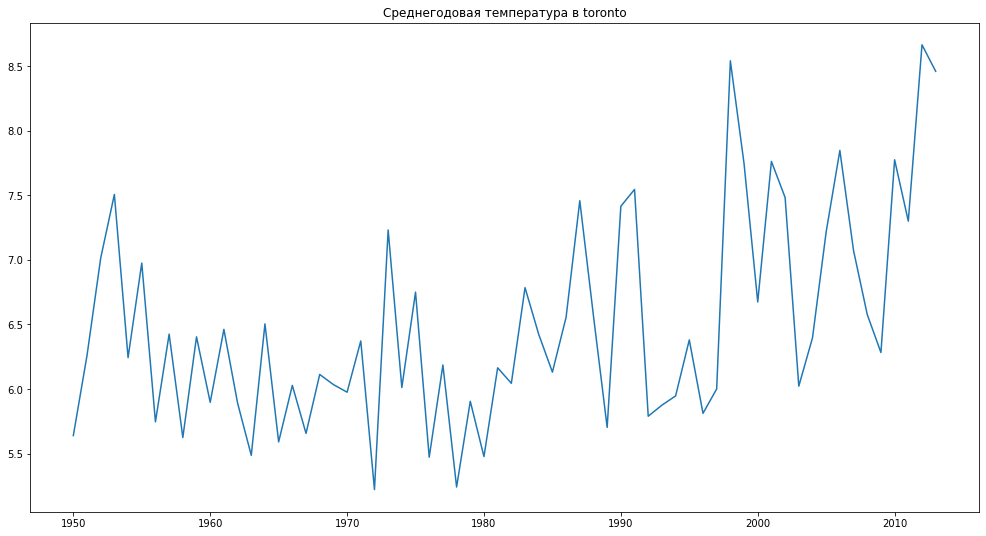

In [35]:
toronto_data = data[data["City"] == "Toronto"]
toronto_data["year"] = toronto_data["dt"].dt.year
toronto_data = toronto_data.groupby('year',as_index=False).agg({'AverageTemperature':'mean'})

plt.figure(figsize=(17, 9))
plt.plot(toronto_data["year"], toronto_data["AverageTemperature"])
plt.title("Среднегодовая температура в toronto")

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [20]:
data.groupby("City", as_index=False).agg({'AverageTemperature':'var'}).sort_values('AverageTemperature',ascending=False).head(1)

,City,AverageTemperature
34,Harbin,218.898616


# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

In [61]:
def correct_latitude(lat):
  try:
    lat = -1 * float(lat.replace("S", ""))
  except:
    lat = float(lat.replace("N", ""))
  return lat


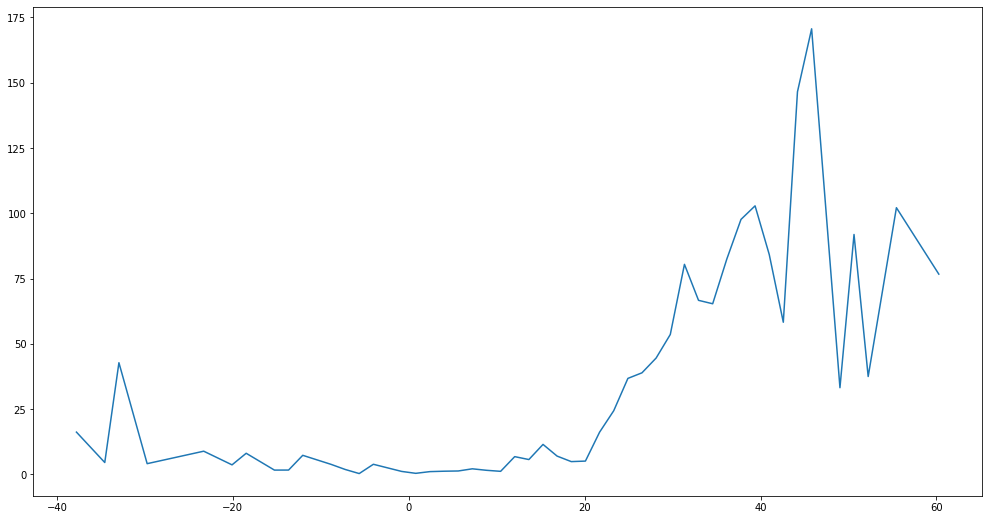

In [62]:
data_var_lat = data.groupby("Latitude", as_index=False).agg({'AverageTemperature':'var'})
data_var_lat['Latitude'] = data_var_lat['Latitude'].apply(lambda x : correct_latitude(x))
data_var_lat = data_var_lat.sort_values('Latitude')
plt.figure(figsize=(17, 9))
plt.plot(data_var_lat['Latitude'], data_var_lat['AverageTemperature'])

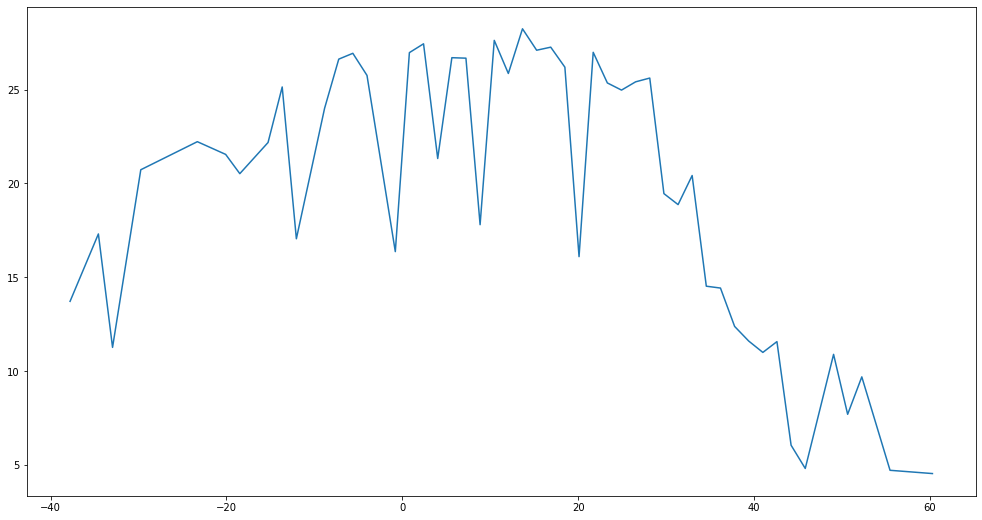

In [65]:
data_jan = data[(data['dt'].dt.year == 1975) & (data['dt'].dt.month == 1)]
data_jan= data.groupby("Latitude", as_index=False).agg({'AverageTemperature':'mean'})
data_jan['Latitude'] = data_jan['Latitude'].apply(lambda x : correct_latitude(x))
data_jan = data_jan.sort_values('Latitude')
plt.figure(figsize=(17, 9))
plt.plot(data_jan['Latitude'], data_jan['AverageTemperature'])

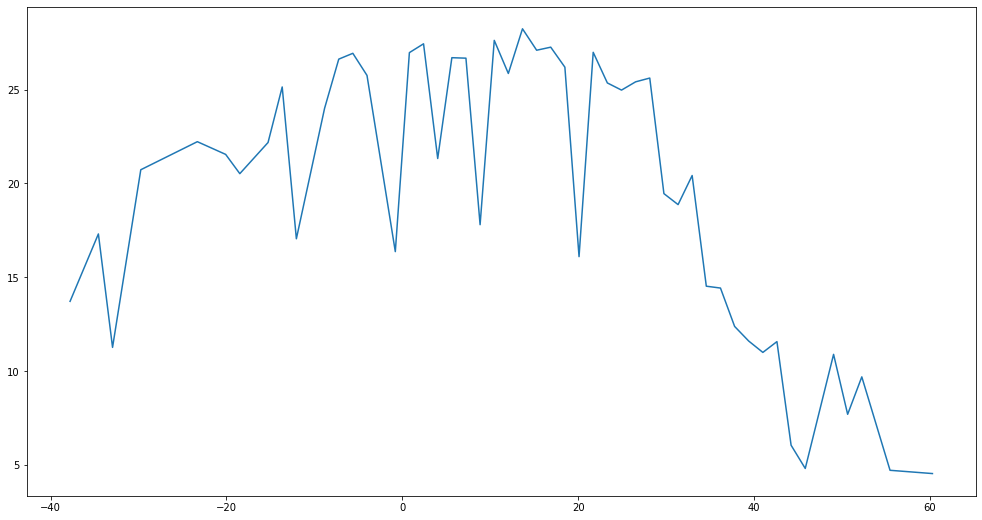

In [66]:
data_jul = data[(data['dt'].dt.year == 1975) & (data['dt'].dt.month == 7)]
data_jul= data.groupby("Latitude", as_index=False).agg({'AverageTemperature':'mean'})
data_jul['Latitude'] = data_jul['Latitude'].apply(lambda x : correct_latitude(x))
data_jul = data_jul.sort_values('Latitude')
plt.figure(figsize=(17, 9))
plt.plot(data_jul['Latitude'], data_jul['AverageTemperature'])

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

In [80]:
from sklearn.linear_model import LinearRegression

data_spb = data[data.City == 'Saint Petersburg']
data_spb['year'] = data_spb['dt'].dt.year
data_spb = data_spb.groupby('year',as_index=False).agg({'AverageTemperature':'mean'})
data_spb['temp_flag'] = (data_spb.AverageTemperature > data_spb.AverageTemperature.shift(-1)) & (data_spb.AverageTemperature > data_spb.AverageTemperature.shift())

model = LinearRegression().fit(data_spb.year[:, None], data_spb.AverageTemperature[:, None])
pred = model.predict(data_spb.year[:, None])

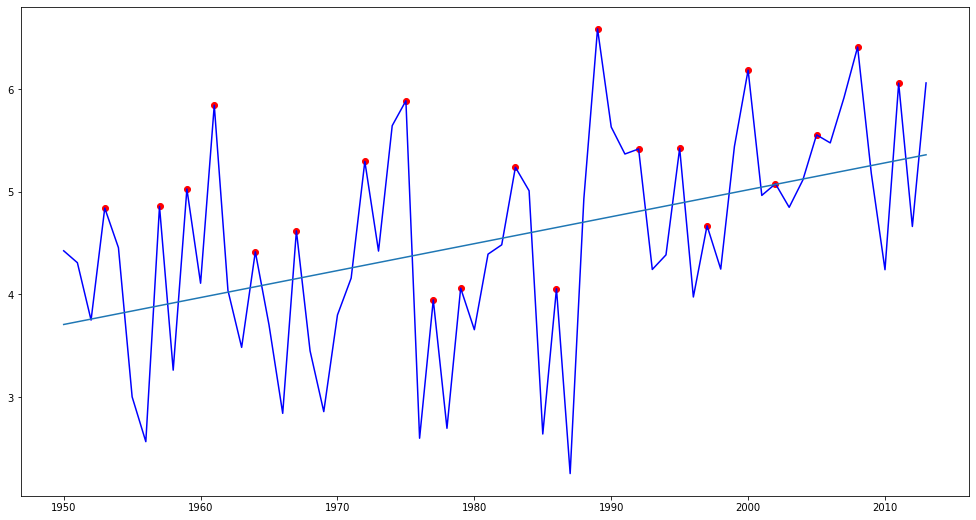

In [84]:
plt.figure(figsize=(17, 9))
plt.scatter(data_spb[data_spb.temp_flag==1].year, data_spb[data_spb.temp_flag==1].AverageTemperature, color='red')
plt.plot(data_spb.year, data_spb.AverageTemperature,color='blue')
plt.plot(data_spb.year, pred)

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [88]:
data_diff = data
data_diff['year'] = data_diff['dt'].dt.year
data_diff['month'] = data_diff['dt'].dt.month

data_diff_yearly = data_diff.groupby(['City','year'],as_index=False).aggregate({'AverageTemperature':'mean'})
data_diff_yearly = data_diff.groupby(['City'],as_index=False).aggregate({'AverageTemperature':'min'}).merge(data_diff.groupby(['City'],as_index=False).aggregate({'AverageTemperature':'max'}),how='inner',on='City')
data_diff_yearly['diff'] = data_diff_yearly.AverageTemperature_y - data_diff_yearly.AverageTemperature_x
data_diff_yearly[['City','diff']].sort_values('diff', ascending=False).head(1)

,City,diff
34,Harbin,49.279


In [93]:
data_diff_jan_jul = data_diff[data_diff.month==1][['year','City','AverageTemperature']].merge(data_diff[data_diff.month==7][['year','City','AverageTemperature']],how='inner',on=['year','City'])
data_diff_jan_jul['diff'] = abs(data_diff_jan_jul.AverageTemperature_x - data_diff_jan_jul.AverageTemperature_y)
data_diff_jan_jul.groupby('City',as_index=False).aggregate({'diff':'mean'}).sort_values('diff', ascending=False).head(1)

,City,diff
34,Harbin,41.992719


In [105]:
# Не совсем понял, что подразумевается под месяцем с отрицательной температурой, поэтому в качестве таких взял месяца с хотя бы одним днем с отрицательной температурой
data_mean_minus = data_diff[data_diff.AverageTemperature < 0]
data_mean_minus = data_mean_minus.groupby(['City','year'], as_index=False).aggregate({'month':'nunique'})
data_mean_minus.merge(data_diff[['City','year']], how='right', on=['year','City']).fillna(0) # Это нужно, чтобы посчитать года, где не было ни одного дня с отрицательной температурой
data_mean_minus.groupby(['City'], as_index=False).aggregate({'month':'mean'}).sort_values('month', ascending=False).head(1)


,City,month
6,Harbin,4.90625


# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента. 

# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

*Ссылка на проект*
https://github.com/KekTyC/PythonHW/tree/main/my_pr
|python -m coldest_major_city_by_year_and_country Страна Год|
Находит большой город с самой малой среднегодовой температурой в указанной стране и указанном году